In [1]:
# Experiment 1: Visual Place Recognition with Positive Transformation
# Dataset: GardensPointWalking (day_left vs night_right)
# Feature Descriptors: DELF-HDC
# Descriptor Dimensions: 4096
# Transformation: Positive shift with normalization
# Purpose: Evaluate impact of positive transformation on VPR performance

In [1]:
from scipy.io import loadmat, savemat
from scipy.linalg import orth
import numpy as np
import faiss
from scipy.spatial.distance import cdist
import pandas as pd
from tqdm import tqdm
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import gc
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'lib')))

from randn2 import randn2 
import peer_functions as peer
from dot_product import CPUDotProduct, LoihiDotProductSimulationPositive, CPUDotProductPositive
from dot_product import ScaleQuery, ScaleDatabase

import math
from tqdm import tqdm
os.environ['OPENBLAS_NUM_THREADS'] = '1'

c:\Users\21361535\AppData\Local\anaconda3\envs\lava3\lib\site-packages\lava\utils\profiler.py:16: UserWarning: Loihi2HWProfiler could not be imported. Currently no profiler is available.
  warnings.warn("Loihi2HWProfiler could not be imported. "


In [2]:
def calculate_evaluation_metrics(similarity_matrix, ground_truth):
    """
    Calculate evaluation metrics for place recognition results
    
    Args:
        similarity_matrix: Matrix of similarity scores between queries and database
        ground_truth: Ground truth data containing GThard and GTsoft
        
    Returns:
        dict: Dictionary containing recalls, precision, recall curves and AUC
    """
    # Get candidate selections
    ids_pos = peer.directCandSel(similarity_matrix)
    
    # Calculate recall values
    recalls = peer.getRecallAtKVector(ids_pos, ground_truth["GT"])
    
    # Calculate precision-recall curves and AUC
    [R, P] = peer.createPR(-similarity_matrix, 
                          ground_truth['GT']["GThard"][0][0], 
                          ground_truth['GT']["GTsoft"][0][0])
    auc = np.trapz(P, R)
    
    return {
        'recalls': recalls,
        'precision': P,
        'recall': R,
        'auc': auc
    }


In [11]:

from copy import deepcopy

n_samples = 200
n_dimensions = 4096

In [29]:
D1 = np.random.randn(n_samples, n_dimensions)
D2 = deepcopy(D1)

noise_level = 1  # You can adjust this value to control the amount of noise
noise = np.random.randn(n_samples, n_dimensions) * noise_level

D2 = D2 + noise

g_truth = loadmat("../datasets/ground_truth/GardensPointWalking/day_left--night_right/gt.mat")

In [30]:
D1.shape
D2.shape

(200, 4096)

In [31]:
dot = CPUDotProduct(D1, D2)

DD = dot.run()

metrics = calculate_evaluation_metrics(DD, g_truth)
print(f"AUC: {metrics['auc']}")

cpu_auc = metrics['auc']


AUC: 1.0


## Positive Transformation

In [32]:
constant = 1/math.sqrt(2)

dot = CPUDotProductPositive(D1, D2, constant)


In [33]:
DD = dot.run()

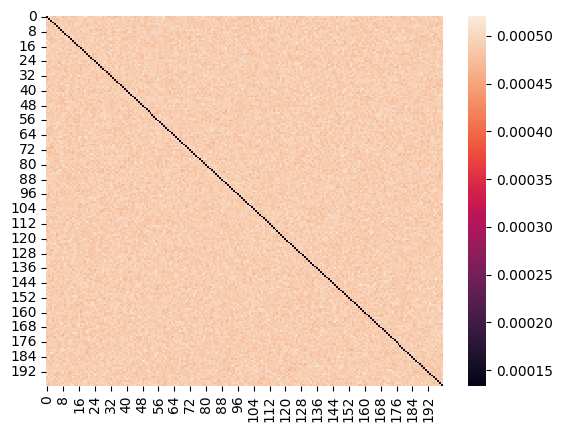

In [34]:
import seaborn as sns

ax = sns.heatmap(DD)
plt.show()

In [35]:

metrics = calculate_evaluation_metrics(DD, g_truth)
print(f"AUC: {metrics['auc']}")

# You can also access other metrics if needed:
# print(f"Recalls: {metrics['recalls']}")
# print(f"Precision: {metrics['precision']}")
# print(f"Recall: {metrics['recall']}")

AUC: 1.0


## Loop for multiple positive values


In [36]:
normalizer = Normalizer()

mu1 = np.mean(D1,axis=0)

D1_centered = np.subtract(D1,mu1)  # database
D2_centered = np.subtract(D2,mu1)

D1_norm = normalizer.fit_transform(D1_centered)
D2_norm = normalizer.fit_transform(D2_centered)

In [37]:
min_D1 = np.min(D1_norm)
overall_min = (min_D1)
print(f"Overall min: {overall_min}")


Overall min: -0.07852523219921305


In [38]:
list_positive_values = np.arange(abs(overall_min), 101, 5) 
auc_values = []  # Store AUC values

for positive_value in list_positive_values:
    dot = CPUDotProductPositive(D1, D2, positive_value)
    DD = dot.run()
    metrics = calculate_evaluation_metrics(DD, g_truth)
    auc_values.append(metrics['auc'])
    print(f"AUC: {metrics['auc']}")


AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0
AUC: 1.0


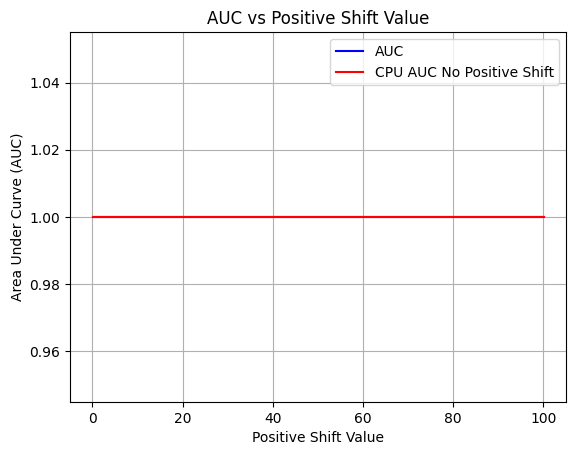

In [39]:
plt.plot(list_positive_values, auc_values, '-b', label='AUC')
plt.plot(list_positive_values, [cpu_auc]*len(list_positive_values), '-r', label='CPU AUC No Positive Shift')
plt.xlabel('Positive Shift Value')
plt.ylabel('Area Under Curve (AUC)')
plt.title('AUC vs Positive Shift Value')
plt.grid(True)
plt.legend()
plt.show()